<a href="https://colab.research.google.com/github/KiranRaghavendra1248/ML-7/blob/master/Fashion_MNIST_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

In [23]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=keras.datasets.fashion_mnist

In [50]:
(X_train,y_train),(X_test,y_test)=dataset.load_data()

In [51]:
X_train=X_train/255.0
X_test=X_test/255.0

In [6]:
print(X_train.shape)

(60000, 28, 28)


In [7]:
y_train[0]

9

In [8]:
#Initial input tensor shape
X_train=X_train.reshape(len(X_train),28,28,1)
X_test=X_test.reshape(len(X_test),28,28,1)

In [9]:
# Use tensorflow.keras and not just keras. Importing Sequential() & necessary layers from keras and not tensorflow.keras leads to returning an invalid model i.e not a model insta of keras.
# We get this error:
# RuntimeError: Model-building function did not return a valid Keras Model instance
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Input

In [10]:
# Lets create a model using Model class

In [11]:
# I/P Layer
def create_model():
  inputs=Input(batch_shape=(None,28,28,1),name='Input')

  # Conv_1 Layer
  x=Conv2D(filters=16,kernel_size=5,activation='relu',name='Conv_1')(inputs)
  # OR
  # conv1=Conv2D(filters=16,kernel_size=5,activation='relu',name='Conv_1')
  # x=conv1(inputs)

  # Max_pool_1 layer
  x=MaxPooling2D(name='Max_pool_1')(x)

  # Conv_2 Layer
  x=Conv2D(filters=32,kernel_size=5,activation='relu',name='Conv_2')(x)

  # Max_pool_2 layer
  x=MaxPooling2D(name='Max_pool_2')(x)

  # Flatten layer
  x=Flatten()(x)

  # Dense_1/FC layer
  x=Dense(256,activation='relu',name='Dense_1')(x)

  # Dense_2/FC layer
  x=Dense(128,activation='relu',name='Dense_2')(x)

  # Output layer
  output=Dense(10, activation='softmax',name='Softmax_layer')(x)

  # Create model using Model class
  model=Model(inputs=inputs,outputs=output)

  return model

In [12]:
model_basic=create_model()

In [13]:
model_basic.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
Max_pool_1 (MaxPooling2D)    (None, 12, 12, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 8, 8, 32)          12832     
_________________________________________________________________
Max_pool_2 (MaxPooling2D)    (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 256)              

In [14]:
model_basic.input

<tf.Tensor 'Input:0' shape=(None, 28, 28, 1) dtype=float32>

In [15]:
for l in model_basic.layers:
  print(l.output)

Tensor("Input:0", shape=(None, 28, 28, 1), dtype=float32)
Tensor("Conv_1/Relu:0", shape=(None, 24, 24, 16), dtype=float32)
Tensor("Max_pool_1/MaxPool:0", shape=(None, 12, 12, 16), dtype=float32)
Tensor("Conv_2/Relu:0", shape=(None, 8, 8, 32), dtype=float32)
Tensor("Max_pool_2/MaxPool:0", shape=(None, 4, 4, 32), dtype=float32)
Tensor("flatten/Reshape:0", shape=(None, 512), dtype=float32)
Tensor("Dense_1/Relu:0", shape=(None, 256), dtype=float32)
Tensor("Dense_2/Relu:0", shape=(None, 128), dtype=float32)
Tensor("Softmax_layer/Softmax:0", shape=(None, 10), dtype=float32)


In [16]:
layer_outputs = [layer.output for layer in model_basic.layers[:5]]

In [17]:
# Craete a model fr activations

In [18]:
activ_model=Model(inputs=model_basic.input,outputs=layer_outputs)

In [19]:
# Predicting using this model returns 5 o/p one fr each conv-layers

In [20]:
activations = activ_model.predict(X_train)

In [21]:
len(activations) # 5 ops correspoding to 5 conv layers

5

In [ ]:
Visualize eg:2

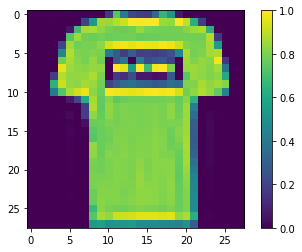

In [53]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


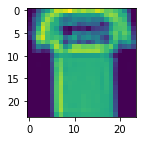

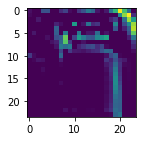

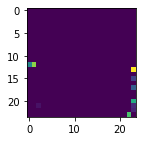

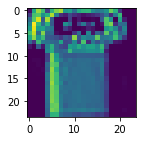

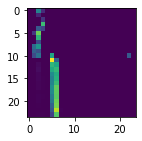

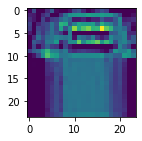

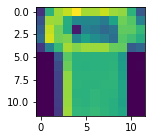

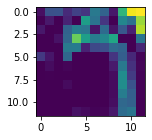

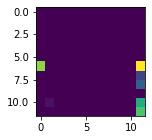

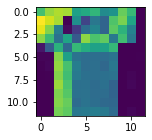

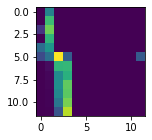

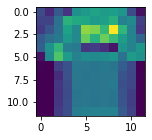

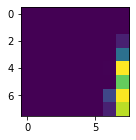

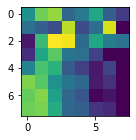

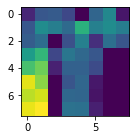

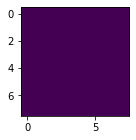

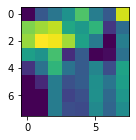

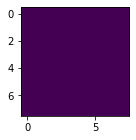

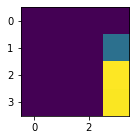

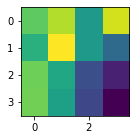

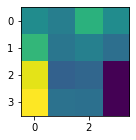

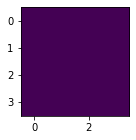

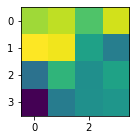

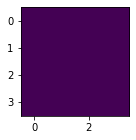

In [68]:
for i in range(1,5):
  layer=activations[i]
  for j in [1,3,6,9,12,15]:  # These channels are visualized in each layer
    plt.figure(figsize=(2,2))
    plt.imshow(layer[1, :, :, j], cmap='viridis')

In [ ]:
model_basic.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_basic.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4729 - accuracy: 0.8256
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8873
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2688 - accuracy: 0.9022
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2393 - accuracy: 0.9114
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2167 - accuracy: 0.9200
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1966 - accuracy: 0.9264
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1799 - accuracy: 0.9324
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1669 - accuracy: 0.9366
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1533 - accuracy: 0.9418
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.141

### Let us now , try to fine tune this model using keras tuner

---



In [ ]:
from tensorflow.keras.optimizers import Adam # Using just keras instead of tensorflow.keras leads to multiple failed model building attempts.

In [ ]:
def test_hyperparams(hp):
  inputs=Input(batch_shape=(None,28,28,1),name='Input')

  # Conv_1 Layer
  x=Conv2D(
      filters=hp.Int('Conv_1_filter',min_value=16,max_value=128,step=16),
      kernel_size=hp.Choice('Conv_1_kernel',values=[3,5]),
      activation='relu',
      name='Conv_1')(inputs)

  # Max_pool_1 layer
  x=MaxPooling2D(name='Max_pool_1')(x)

  # Conv_2 Layer
  x=Conv2D(filters=hp.Int('Conv_2_filter',min_value=16,max_value=64,step=16),
           kernel_size=hp.Choice('Conv_2_kernel',values=[3,5]),
           activation='relu',
           name='Conv_2')(x)

  # Max_pool_2 layer
  x=MaxPooling2D(name='Max_pool_2')(x)

  # Flatten layer
  x=Flatten()(x)

  # Dense_1/FC layer
  x=Dense(hp.Int('Dense_1_units',min_value=64,max_value=512,step=64),
          activation='relu',
          name='Dense_1')(x)

  # Dense_2/FC layer
  x=Dense(hp.Int('Dense_2_units',min_value=64,max_value=256,step=64),
          activation='relu',
          name='Dense_2')(x)

  # Output layer
  output=Dense(10, activation='softmax',name='Softmax_layer')(x)

  # Create model using Model class
  model=Model(inputs=inputs,outputs=output)

  # Compile the model
  model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])))

  return model


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_rsearch=RandomSearch(test_hyperparams,objective='val_accuracy',max_trials=5,directory='output',project_name='MNIST CNN')

In [ ]:
tuner_rsearch.search(X_train,y_train,epochs=3,validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5478 - accuracy: 0.7982 - val_loss: 0.4461 - val_accuracy: 0.8441
Epoch 2/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4165 - accuracy: 0.8480 - val_loss: 0.3814 - val_accuracy: 0.8631
Epoch 3/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3973 - accuracy: 0.8548 - val_loss: 0.4022 - val_accuracy: 0.8561


Epoch 1/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5647 - accuracy: 0.7909 - val_loss: 0.4582 - val_accuracy: 0.8299
Epoch 2/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4106 - accuracy: 0.8490 - val_loss: 0.4143 - val_accuracy: 0.8487
Epoch 3/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3918 - accuracy: 0.8568 - val_loss: 0.4638 - val_accuracy: 0.8229


Epoch 1/3
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5342 - accuracy: 0.8001 - val_loss: 0.4766 - val_accuracy: 0.8232
Epoch 2/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4283 - accuracy: 0.8442 - val_loss: 0.4077 - val_accuracy: 0.8521
Epoch 3/3
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4041 - accuracy: 0.8522 - val_loss: 0.4407 - val_accuracy: 0.8498


Epoch 1/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4698 - accuracy: 0.8260 - val_loss: 0.3320 - val_accuracy: 0.8807
Epoch 2/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3022 - accuracy: 0.8885 - val_loss: 0.3241 - val_accuracy: 0.8798
Epoch 3/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2577 - accuracy: 0.9049 - val_loss: 0.2896 - val_accuracy: 0.8947


Epoch 1/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5988 - accuracy: 0.7746 - val_loss: 0.4704 - val_accuracy: 0.8213
Epoch 2/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4563 - accuracy: 0.8308 - val_loss: 0.4585 - val_accuracy: 0.8253
Epoch 3/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4279 - accuracy: 0.8404 - val_loss: 0.4913 - val_accuracy: 0.8207


INFO:tensorflow:Oracle triggered exit


In [ ]:
model_best=tuner_rsearch.get_best_models()[0]

In [ ]:
model_best.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
Max_pool_1 (MaxPooling2D)    (None, 13, 13, 96)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 9, 9, 48)          115248    
_________________________________________________________________
Max_pool_2 (MaxPooling2D)    (None, 4, 4, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 512)               393728

In [ ]:
# This is out best model as chosen by keras tuner

In [ ]:
model_best.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2261 - accuracy: 0.9175 - val_loss: 0.2796 - val_accuracy: 0.8974
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1963 - accuracy: 0.9273 - val_loss: 0.2819 - val_accuracy: 0.8981
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1712 - accuracy: 0.9353 - val_loss: 0.2631 - val_accuracy: 0.9062
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1527 - accuracy: 0.9423 - val_loss: 0.2914 - val_accuracy: 0.9057
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1319 - accuracy: 0.9492 - val_loss: 0.2839 - val_accuracy: 0.9062
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1179 - accuracy: 0.9549 - val_loss: 0.3020 - val_accuracy: 0.9087
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1042 - accuracy: 0.9607 - val_loss: 0.2918 - val_accuracy:

In [ ]:
# So our best_model has an train accuracy of 99% and a CV accuracy of 90%.
# Overfitting is clearly evident.